# Comparaciones entre distribuciones y correlaciones
## Una aclaración entre conceptos y formalismos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = pd.read_csv('C:/Users/guill/OneDrive/Documentos/Tesis/Proyect/03_15_2024_Pt_Ni_rand_dist/Ni_100/Ni-FCC_d.txt', sep= '\\s+')

In [2]:
normalization_factor = pow(file['h(r)'].mean(), -1.0)
file.loc[:, file.columns != '#r(A)'] = file.loc[:, file.columns != '#r(A)'] * normalization_factor
print('Normalization Factor:', normalization_factor)
mean_PDF = file['G(r)'].mean()
print('Mean PDF:', mean_PDF.round())

Normalization Factor: 16.000009600005757
Mean PDF: -0.0


## Zero Approach
Partiendo de la definición 

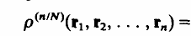 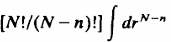 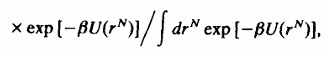

tenemos la función de distribución radial

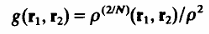

Definición de $G(r)$ total en la literatura (mediante termodinámica/MD), también con la llamada función de correlación total $H(r)$ y su relación con el método PDF:

$G(r) = g(r_1,r_2) = H(r) + 1 = \frac{\rho^{PDF}(r)}{\rho_{0}} (\sum_{i=1}^{N} c_i \bar{b_i})^2$

donde $c_i$ es la proporción de especies $i$ en el material, en cambio nosotros usamos el formalismo de PDFFIT:

$G^{PDF}(r) = 4 \pi r [\rho^{PDF}(r) - \rho_0]$

donde

$\rho^{PDF} = \rho_0 G'(r)$

y 

$G'(r) = (\sum_{i=1}^{N} c_i \bar{b_i})^{-2} \sum_{i,j=1}^{N} c_i c_j \bar{b_i} \bar{b_j} g_{i,j} (r)$

y para eso se define la función de correlación $g_{i,j}(r)$ como:

$g_{i,j}(r)= \frac{n_{i,j}(r)}{4\pi r^2 dr \rho c_{j} \rho_{0}}$

donde $\rho_0 = N/V$ y $n_{i,j(r)}$ son el numero de partículas de tipo j entre r y $r + dr$ desde una partícula de tipo i.

las funciones G'(r) y G^{PDF}(r) tienen los valores límites:

$G'(r<r^0) = 0$

$G'(r\rightarrow \infty) = 1$

$G^{PDF}(r<r^0) \approx -4\pi r \rho_0$

$G^{PDF}(r\rightarrow \infty) = 0$

donde $\rho_0$ es la densidad atómica promedio.

Por lo tanto tenemos que:

$G^{PDF}(r) = 4 \pi \rho_0 r [G'(r) - 1]$

$\rho^{PDF} \propto \rho_0 G(r)$

$G(r) \propto \frac{G^{PDF}(r)}{4 \pi r \rho_0} + 1$


0.0625 16.000009600005757
24.02 0.9943006427976625


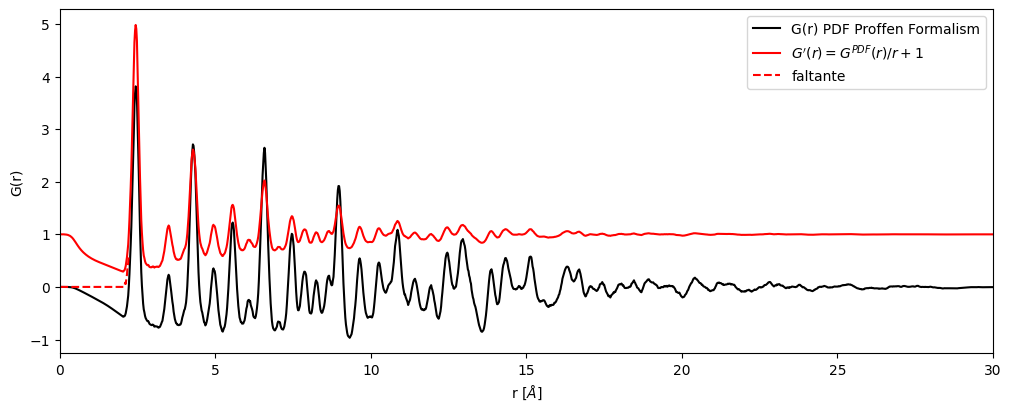

In [3]:
data = file.copy()
fig, ax =plt.subplots(figsize=(10,4), layout='constrained')
ax.plot(data['#r(A)'], data['G(r)'], color = 'black', label = 'G(r) PDF Proffen Formalism')

mean_density = data['Base'].mean()
print(1/16, normalization_factor)
scale_factor = 0.5*4*3.1416/normalization_factor # 4*pi*rho_0
g_r = pow(scale_factor,-1)*(data['G(r)']/data['#r(A)']) + 1
# g_r = (data['G(r)']/data['#r(A)']) + 1

print(data['#r(A)'].iloc[1200],g_r.loc[1200])

# ax.plot(data['#r(A)'].loc[108:], g_r.loc[108:], color = 'red', label = "$G'(r)= G^{PDF}(r)/r+1$")
ax.plot(data['#r(A)'], g_r, color = 'red', label = "$G'(r)= G^{PDF}(r)/r+1$")
ax.plot(data['#r(A)'].loc[0:110], data['h(r)'].loc[0:110], color = 'red', linestyle='--', label = 'faltante')

ax.set_xlabel('r [$\\AA$]')
ax.set_xlim([0,30])
ax.set_ylabel('G(r)')
ax.legend()
plt.rc('font', size=12)
plt.rcParams['font.family'] = 'serif'
plt.show()

## Density Aprroach
Trying with an exponential function

In [16]:
import plotly.express as px
density = pd.read_csv('density.txt', sep='\\s+')
density.index = density['#r(A)']
density = density.drop(columns=['#r(A)'])

In [18]:
px.line(density.loc[:33], title='Density of Ni 100')

In [22]:
px.line((density.index*(density['ρ_smooth(r)']-density['Base'])).loc[:33], title='Density of Ni 100')

In [24]:
operated_density = density.index * (density['ρ_smooth(r)'] - density['Base'])
mean_PDF = operated_density.mean()
print('Mean PDF:', mean_PDF.round(4))

Mean PDF: -0.0011
